# House Prices - Advanced Regression Techniques

## How to Handle Categorical missing values

### 1. Frequent Category Imputation

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\Nikhil\Downloads\house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.tail()

,BsmtQual,FireplaceQu,GarageType,SalePrice
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125
1459,TA,NaN,Attchd,147500


In [5]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [6]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [7]:
df.isna().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [8]:
df.BsmtQual.mode()

0    TA
dtype: object

In [9]:
df.groupby('BsmtQual')['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

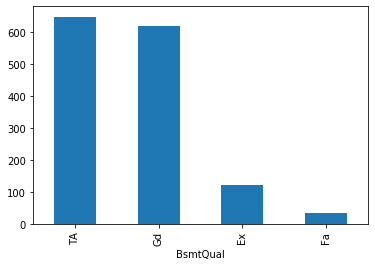

In [10]:
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [11]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [12]:
def impute_nan(df, variable):
    df[variable].fillna(df[variable].mode()[0], inplace=True)

In [13]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [14]:
df.isna().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### 2.Adding variable to capture null value

In [16]:
df = pd.read_csv(r'C:\Users\Nikhil\Downloads\house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.tail()

,BsmtQual,FireplaceQu,GarageType,SalePrice
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125
1459,TA,NaN,Attchd,147500


In [17]:
def impute_Nan_with_variable(df, variable):
    df[variable+'_nan_value'] = np.where(df[variable].isna(),1,0)

In [18]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_Nan_with_variable(df,feature)

In [19]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan_value,FireplaceQu_nan_value,GarageType_nan_value
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [20]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan_value,FireplaceQu_nan_value,GarageType_nan_value
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


### 3. Replace NaN with new category

In [23]:
df = pd.read_csv(r'C:\Users\Nikhil\Downloads\house_train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.tail()

,BsmtQual,FireplaceQu,GarageType,SalePrice
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125
1459,TA,NaN,Attchd,147500


In [24]:
def impute_nan_new_category(df,variable):
    df[variable+'_new_var']= np.where(df[variable].isna(), 'missing', df[variable])

In [25]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan_new_category(df,feature)

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [27]:
df.drop(['BsmtQual','FireplaceQu','GarageType'], axis=1, inplace=True)
df.head()

,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handling Categorical Features

### 1. One Hot Encoding

In [28]:
df = pd.read_csv(r'C:\Users\Nikhil\Downloads\titanic_train.csv',usecols=['Sex'])
df.tail()

,Sex
886,male
887,female
888,female
889,male
890,male


In [29]:
pd.get_dummies(df,drop_first=True)

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
df = pd.read_csv(r'C:\Users\Nikhil\Downloads\titanic_train.csv',usecols=['Embarked'])
df.tail()

,Embarked
886,S
887,S
888,S
889,C
890,Q


In [31]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
df.dropna(inplace=True)

In [33]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
